In [37]:
# All imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import random as rnd


In [38]:
# Read the dataframe into pandas 
advertising_df = pd.read_csv('Advertising.csv')

In [39]:
rnd.seed(42)

In [40]:
# Calculate the mean / standard dev

tv_mean = advertising_df['TV'].mean()
tv_std = advertising_df['TV'].std() 

tv_min = advertising_df['TV'].min()
tv_max = advertising_df['TV'].max()

# Now add standardization column to table
advertising_df['TVst'] = (advertising_df['TV'] - tv_mean) / tv_std

# Now add normalized column to table
advertising_df['TVnorm'] = (advertising_df['TV'] - tv_min) / (tv_max - tv_min)



In [41]:
advertising_df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales,TVst,TVnorm
0,1,230.1,37.8,69.2,22.1,0.967425,0.775786
1,2,44.5,39.3,45.1,10.4,-1.194379,0.148123
2,3,17.2,45.9,69.3,9.3,-1.512360,0.055800
3,4,151.5,41.3,58.5,18.5,0.051919,0.509976
4,5,180.8,10.8,58.4,12.9,0.393196,0.609063
5,6,8.7,48.9,75.0,7.2,-1.611365,0.027054
6,7,57.5,32.8,23.5,11.8,-1.042960,0.192087
7,8,120.2,19.6,11.6,13.2,-0.312652,0.404126
8,9,8.6,2.1,1.0,4.8,-1.612530,0.026716
9,10,199.8,2.6,21.2,10.6,0.614501,0.673318


-1.7045460571476594 1.7396637185399422
1.6 27.0
[[14.0225]]
Slope is:  [[4.08122196]]
Y-Intercept is:  [14.0225]


/Users/arielt/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


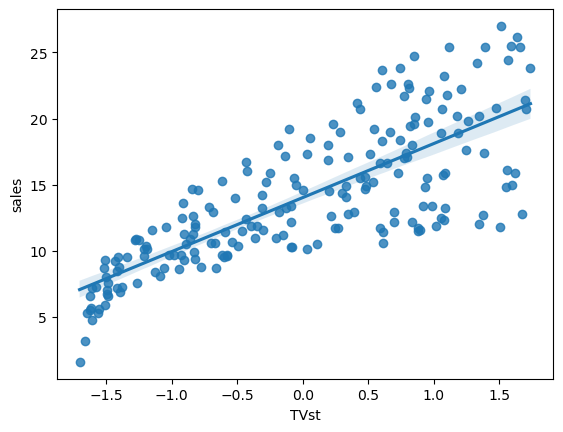

In [42]:
df1=advertising_df.copy()
print(df1['TVst'].min(),df1['TVst'].max())
print(df1['sales'].min(),df1['sales'].max())
sns.regplot(x='TVst', y = 'sales', data=advertising_df)
xx = df1[['TVst']]
yy = df1[['sales']]
lr1 = LinearRegression()
lr1.fit(x,y)
z = np.array([lr1.intercept_]).reshape(-1,1)
print(lr1.predict([[0]]))
y_intercept1 = lr1.intercept_
coef1 = lr1.coef_
print("Slope is: ", coef1)
print("Y-Intercept is: ", y_intercept1)

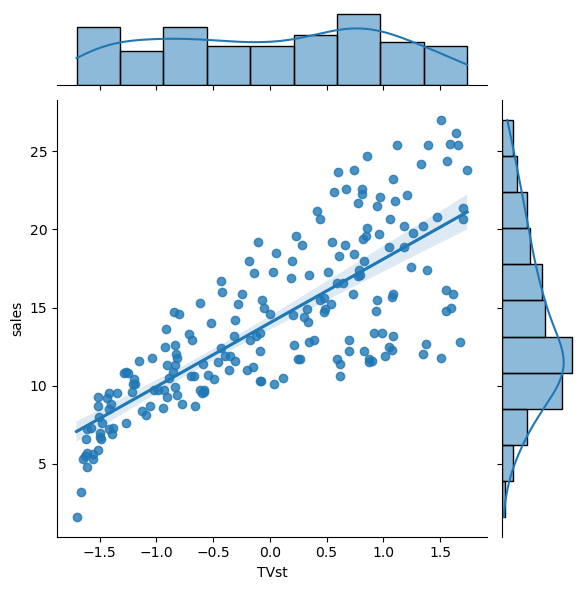

In [43]:
# Create a joint plot 
sns.jointplot(x='TVst', y = 'sales', data=advertising_df, kind='reg')



In [44]:

# Calculate the MSE using actual and predicted 
def mse (actual, predicted): 
    return np.mean((actual - predicted) **2 )
    



In [45]:
# Calculate the MAE using actual and predicted
def mae (predicted, actual): 
    return np.mean(np.abs(predicted - actual))


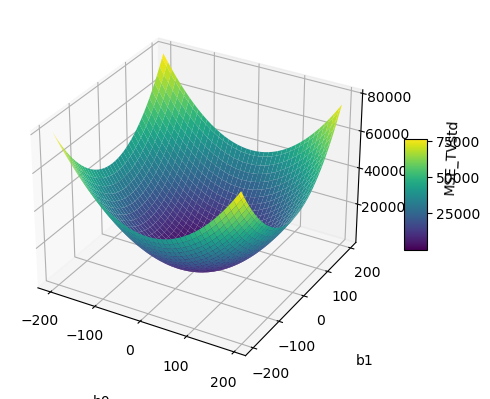

In [49]:
# Find the error values with each combination 
def findz(c0,c1, arr, func): 
    r = []
    for b0 in c0: 
        errors = [] 
        for b1 in c1: 
            pred = b0 + b1 * arr
            error = func(arr, pred)
            errors.append(error)
        r.append(errors)
    return np.array(r)
    

# Create two surface plots depicting MSE as a function of b0 and b1 

# Create std surface plot

b0 = np.arange(-200, 200, 5)
b1 = np.arange(-200, 200, 5)

b0g, b1g = np.meshgrid(b0, b1)

# Create plot TVstd
mse_tvstd = findz(b0, b1, advertising_df['TVst'], mse)
fig = plt.figure()
ax = plt.axes(projection='3d')
s = ax.plot_surface(b0_grid, b1_grid, mse_tvstd, cmap=plt.cm.viridis)


# Set axis label
ax.set_xlabel('b0', labelpad=20)
ax.set_ylabel('b1', labelpad=20)
ax.set_zlabel('MSE_TVstd', labelpad=20)

fig.colorbar(s, shrink=.3, aspect=5)

plt.show()






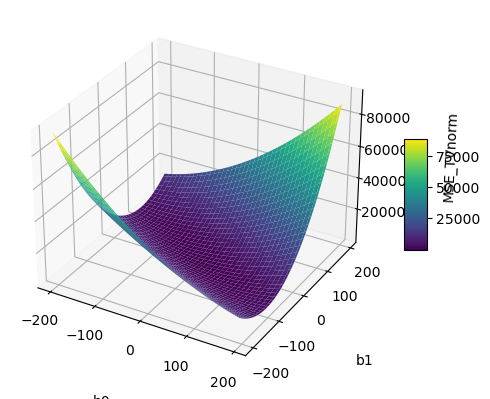

In [51]:
# Create norm surface plot
# Create the MSE TVnorm plot
mse_tvnorm = findz(b0, b1, advertising_df['TVnorm'], mse)

fig = plt.figure()
ax = plt.axes(projection='3d')
s = ax.plot_surface(b0_grid, b1_grid, mse_tvnorm, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=20)
ax.set_ylabel('b1', labelpad=20)
ax.set_zlabel('MSE_TVnorm', labelpad=20)

fig.colorbar(s, shrink=.3, aspect=5)

plt.show()


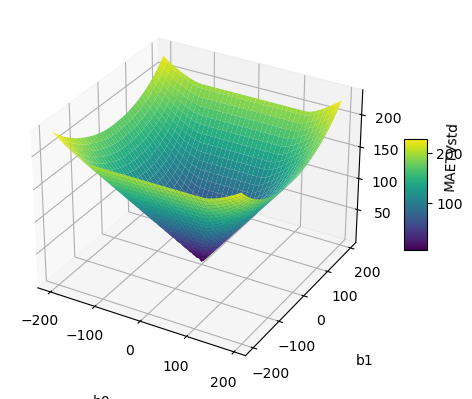

In [52]:
# MAE Surface Plots


# Create the MAE TVstd plot
mae_tvstd = findz(b0, b1, advertising_df['TVst'], mae)

fig = plt.figure()
ax = plt.axes(projection='3d')
s = ax.plot_surface(b0_grid, b1_grid, mae_tvstd, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=20)
ax.set_ylabel('b1', labelpad=20)
ax.set_zlabel('MAETVstd', labelpad=20)

fig.colorbar(s, shrink=.3, aspect=5)

plt.show()





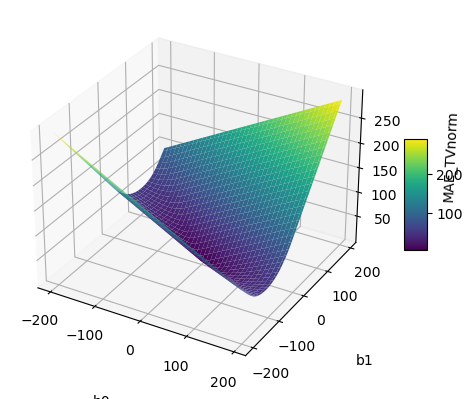

In [53]:
# Create the MAE TVnorm plot
mae_TVnorm = findz(b0, b1, advertising_df['TVnorm'], mae)

fig = plt.figure()
ax = plt.axes(projection='3d')
s = ax.plot_surface(b0_grid, b1_grid, mae_TVnorm, cmap=plt.cm.viridis)

ax.set_xlabel('b0', labelpad=20)
ax.set_ylabel('b1', labelpad=20)
ax.set_zlabel('MAE_TVnorm', labelpad=20)

fig.colorbar(s, shrink=.3, aspect=5)


plt.show()

In [54]:
# Q5 : 

# Scikit learn does not standardize feature values by default but results are much better when we standardize feature values 
# ourselves when using Scikit Learn. We can see this comparing the graphs in that the standardzied data has a much better curve and fit.
# Standardization is important when the input data has large differences in ranges or they are measured in different units. 
# 

In [59]:
stepProgressB0 = []
stepProgressB1 = []
def random_step(x, y, iterations = 1000):
    b0cur = rnd.uniform(-200, 200)
    b1cur = rnd.uniform(-200, 200)
    msecur = mse(y, b0cur + b1cur * x)

    for i in range(iterations):
        newb0 = b0cur + rnd.uniform(-1, 1)
        newb1 = b1cur + rnd.uniform(-1, 1)
        newmse = mse(y, newb0 + newb1 * x)

        if newmse < msecur:
            stepProgressB0.append(b0cur)
            stepProgressB1.append(b1cur)
            b0cur, b1cur = newb0, newb1
            msecur = newmse
    return b0cur, b1cur

random_step(advertising_df['TVst'], advertising_df['sales'])
    
    
# Yes, results are consistent with the joint plot in problem 3. The slope of the joint plot is around 4 and the y-intercept when 
# x is equal to 0 is around 14. 


(14.003659633069038, 4.04433273205735)

In [60]:
# Modify random step for gradient descent 

gradientProgressB0 = []
gradientProgressB1 = []
def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    b0 = rnd.uniform(-200, 200)
    b1 = rnd.uniform(-200, 200)


    for i in range(iterations):
        gradientProgressB0.append(b0)
        gradientProgressB1.append(b1)
        y_pred = b0 + b1 * x
        b0_gradient = -2/len(x) * sum(y - y_pred)
        b1_gradient = -2/len(x) * sum((y - y_pred) * x)
        b0 = b0 - learning_rate * b0_gradient
        b1 = b1 - learning_rate * b1_gradient

    return b0, b1

gradient_descent(advertising_df['TVst'], advertising_df['sales'])


(14.022500196883975, 4.08122224968829)

In [61]:
# Determine a linear best fit using the scikit-learn linear regression model. 
x = advertising_df[['TVst']]
y = advertising_df[['sales']]
lr = LinearRegression()
lr.fit(x,y)
y_intercept = lr.intercept_
coef = lr.coef_
print("Slope is: ", coef)
print("Y-Intercept is: ", y_intercept)

Slope is:  [[4.08122196]]
Y-Intercept is:  [14.0225]


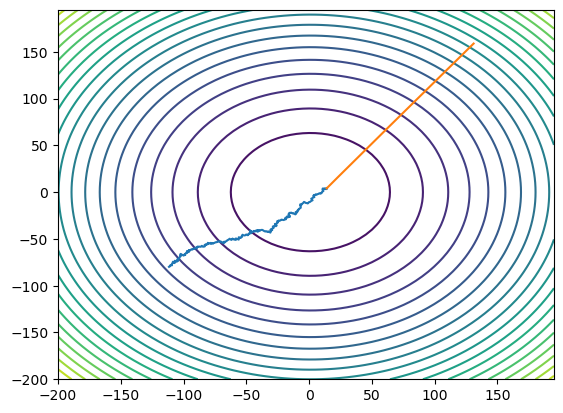

In [62]:

cp = plt.contour(b0g, b1g, mse_tvstd, 20)
plt.plot(stepProgressB0 , stepProgressB1)
plt.plot(gradientProgressB0, gradientProgressB1)
plt.show()

